## **5 KEY UNDERSTANDINGS**

### **1.How the coefficients get affected?**

As we increase the value of alpha the coeffients decreases and on further increasing of alpha coefficients tends to apporach to zero but donot become zero. The increase in the value of the alpha increases the value of loss thus penalizing the lareger coefficients thus as the alpha increases the loss reducing tendency of the ridge regerssion reduces the value of the coefficients.

### **Higher values are impacted nore**
* If a particluar coefficents is more than it will decrease more than the which are lower. 


### **Bias varience tradeoff**
* It balances the bias and varience thus reducing the overfitting with the increasing alpha upto optimal point.

In [1]:
import pandas as pd 
import numpy as np

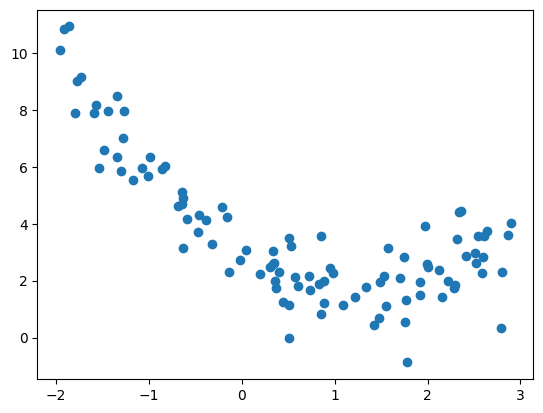

In [2]:
m=100
X=5*np.random.rand(m,1)-2
y=0.7*X**2-2*X+3+np.random.randn(m,1)
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,random_state=42,test_size=0.3)



In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=15)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)


In [5]:
from sklearn.linear_model import Ridge

In [ ]:
from mlxtend.evaluate import bias_varience_decomp
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
varience=[]
for i in alphas:
    reg=Ridge(alpha=i)
    avg_expected_loss,avg_bias,avg_var=bias_varience_decomp(
        reg,X_train,y_train,X_test,y_test,
        loss='mse',
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    varience.append(avg_var)
    
    